In [40]:
import time
import numpy as np
import tkinter as tk
from PIL import ImageGrab
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
x_train = x_train / 255.0  
x_test = x_test / 255.0

In [43]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [44]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [45]:
y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)

In [46]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\jathi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
start_time = time.time()
history = model.fit(x_train,y_train_encoded, epochs=10,batch_size=64,validation_data=(x_test, y_test_encoded))
end_time = time.time

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8104 - loss: 0.5862 - val_accuracy: 0.9788 - val_loss: 0.0627
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9667 - loss: 0.1122 - val_accuracy: 0.9864 - val_loss: 0.0403
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9745 - loss: 0.0862 - val_accuracy: 0.9882 - val_loss: 0.0329
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9806 - loss: 0.0647 - val_accuracy: 0.9901 - val_loss: 0.0298
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9829 - loss: 0.0604 - val_accuracy: 0.9910 - val_loss: 0.0258
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9834 - loss: 0.0537 - val_accuracy: 0.9903 - val_loss: 0.0267
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9858 - loss: 0.0476 - val_accuracy: 0.9912 - val_loss: 0.0234
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9859 - loss: 0.0452 - val_accuracy: 0.

In [48]:
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training time: 160.11 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0390
Test Accuracy: 0.9901


In [49]:
sample = x_test[0].reshape(1, 28, 28, 1) 
prediction = model.predict(sample)
predicted_digit = np.argmax(prediction)  

print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted Digit: 7


Text(0.5, 1.0, 'Loss')

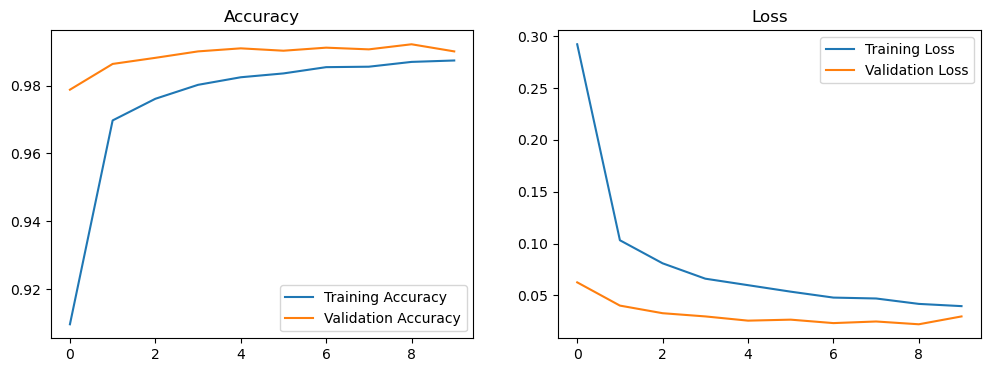

In [50]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


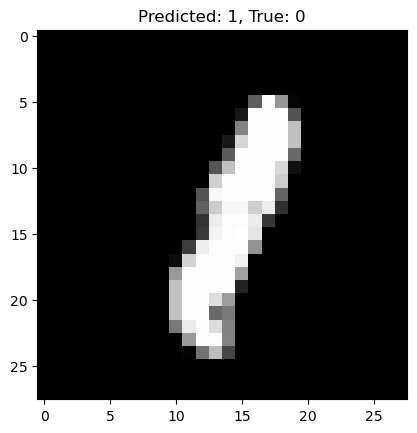

In [51]:
predictions = model.predict(x_test)


def plot_image(pred, true_label, img):
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {pred}, True: {true_label}")
    plt.axis('on')
    plt.show()

sample = 190
plot_image(np.argmax(predictions[sample]), np.argmax(y_test[sample]), x_test[sample].reshape(28, 28))